## PHYS-253 

## Homework 2

Handed out: Friday, March 21, 2025

**Due: 4.59 pm; Monday, March 31, 2025**

<div style="border: 1px solid lightgray; padding: 10px; background-color: #f9f9f9;">

<font size=1>

    Georgios Neofotistos, 2025. All rights reserved.

This work is the intellectual property of `Georgios Neofotistos`. All content produced in this notebook is original creation of the author unless specified otherwise. Unauthorized use, reproduction, or distribution of this material, in whole or in part, without explicit permission from the author, is strictly prohibited.
</font>
</div>

## Instructions

a) You are allowed to discuss with your fellow students HOW to solve the problems. Collaboration is encouraged! But you need to hand in your INDIVIDUAL SOLUTION.  

d) List AI assistants (e.g., ChatGPT) that you worked with in arriving at a solution, or other software/tool; see detailed instructions in next cell. 

c) You can use code from previous lectures/labs - you don't neeed to reference this, it is part of the knowledge you acquired in this course.  However, if you use code from other sources, you MUST include a reference to the source.

d) Submit your Notebook (with solutions/answers) to Phys-253 site (area: ΕΡΓΑΣΙΕΣ / HW2).

### On the use of AI assistants (e.g., ChatGPT, or other Generative A.I. tools)

ChatGPT can be used as an on-line “office hours” resource to help with your learning. 
You can use ChatGPT-generated code (e.g. as inspiration if you are stuck or other reasons), however, submission of ChatGPT-generated
code without explanation or acknowledgment will earn you 0 credit. See cell below.

---

***NOTE: if it takes too much time to train your networks, try running them for a few epochs, but make sure that they run well (that is, without errors in setting up the model, compiling, and running it).***

__________________________________________________________________________________________________________________________

### Problem 1 (pretraining problem)


a. Build a dense neural net (DNN) with five hidden layers of 100 neurons each, He initialization, and the ELU activation function.

b. Using Adam optimization and early stopping, try training it on MNIST but only on digits 0 to 4 [*this will be useful for the next problem as you will use transfer learning for digits 5 to 0 in that problem*]. You will need a softmax output layer with five neurons.

c. Try adding Batch Normalization and compare the learning curves. Is it converging faster than before? Does it produce a better model?

d. Try adding dropout to every layer and try again. Does it produce a better model?

# Ερώτημα a) & b)

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Conv2D
from tensorflow.keras.layers import Input , Flatten, Dropout, MaxPooling2D
from keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import cv2
import random 
import time
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

In [2]:
model = keras.models.Sequential()

model.add(Input(shape=(28,28))) #input
model.add(Flatten())
for _ in range(5):
    model.add(Dense(100, activation='elu',kernel_initializer='he_normal'))  #hidden
model.add(Dense(5, activation='softmax'))  #output
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           505 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119,405 (466.43 KB)

 Trainable params: 119,405 (466.43 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
(X_train_full, y_train_full), (X_test_full,y_test_full) = mnist.load_data()
X_train_full =  X_train_full.astype('float')/255.
X_test_full =  X_test_full.astype('float')/255.  #normalization
print(X_train_full.shape, X_test_full.shape)

(60000, 28, 28) (10000, 28, 28)


In [4]:
train_mask = y_train_full<5
test_mask = y_test_full<5
X_train,y_train = X_train_full[train_mask], y_train_full[train_mask]
X_test,y_test = X_test_full[test_mask],y_test_full[test_mask]

In [5]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
early_stopping=EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
history=model.fit(X_train,y_train,epochs=500,validation_split=0.2,batch_size=64,callbacks=[early_stopping])

Epoch 1/500
383/383 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9228 - loss: 0.2250 - val_accuracy: 0.9863 - val_loss: 0.0504
Epoch 2/500
383/383 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9807 - loss: 0.0620 - val_accuracy: 0.9873 - val_loss: 0.0408
Epoch 3/500
383/383 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9872 - loss: 0.0402 - val_accuracy: 0.9871 - val_loss: 0.0406
Epoch 4/500
383/383 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9907 - loss: 0.0277 - val_accuracy: 0.9899 - val_loss: 0.0401
Epoch 5/500
383/383 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9899 - loss: 0.0288 - val_accuracy: 0.9899 - val_loss: 0.0356
Epoch 6/500
383/383 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9931 - loss: 0.0215 - val_accuracy: 0.9889 - val_loss: 0.0435
Epoch 7/500
383/383 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9923 - loss: 0.0241 - val_accuracy: 0.9855 - val_loss: 0.0588
Epoch 8/500
383/383 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9946 - loss: 0.0153 - val_accu

# Ερώτημα c)

In [6]:
model_bn = keras.models.Sequential()

model_bn.add(Input(shape=(28,28))) #input
model_bn.add(Flatten())
for _ in range(5): 
    model_bn.add(Dense(100, activation='elu',kernel_initializer='he_normal'))  #hidden
    model_bn.add(BatchNormalization())
model_bn.add(Dense(5, activation='softmax'))  #output
model_bn.summary()

model_bn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_bn = model_bn.fit(X_train, y_train, epochs=500, validation_split=0.2,batch_size=64, callbacks=[early_stopping])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 5)              │           505 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,405 (474.24 KB)

 Trainable params: 120,405 (470.33 KB)

 Non-trainable params: 1,000 (3.91 KB)

Epoch 1/500
383/383 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9266 - loss: 0.2233 - val_accuracy: 0.9822 - val_loss: 0.0645
Epoch 2/500
383/383 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9832 - loss: 0.0572 - val_accuracy: 0.9856 - val_loss: 0.0452
Epoch 3/500
383/383 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9903 - loss: 0.0330 - val_accuracy: 0.9838 - val_loss: 0.0503
Epoch 4/500
383/383 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9938 - loss: 0.0195 - val_accuracy: 0.9874 - val_loss: 0.0447
Epoch 5/500
383/383 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9964 - loss: 0.0117 - val_accuracy: 0.9902 - val_loss: 0.0399
Epoch 6/500
383/383 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9953 - loss: 0.0137 - val_accuracy: 0.9855 - val_loss: 0.0476
Epoch 7/500
383/383 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9952 - loss: 0.0142 - val_accuracy: 0.9851 - val_loss: 0.0566
Epoch 8/500
383/383 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9957 - loss: 0.0120 - val_accu

**Από το Epoch 14 και μετά, το training accuracy γίνεται 1.0000 (δηλαδή το μοντέλο προβλέπει τέλεια το training set).
Ταυτόχρονα όμως, το validation accuracy παραμένει σταθερά υψηλό (περίπου 0.993) και δεν πέφτει, ενώ και το validation loss σταθεροποιείται γύρω στο 0.03. Άρα δεν έχω περίπτωση overfit.**

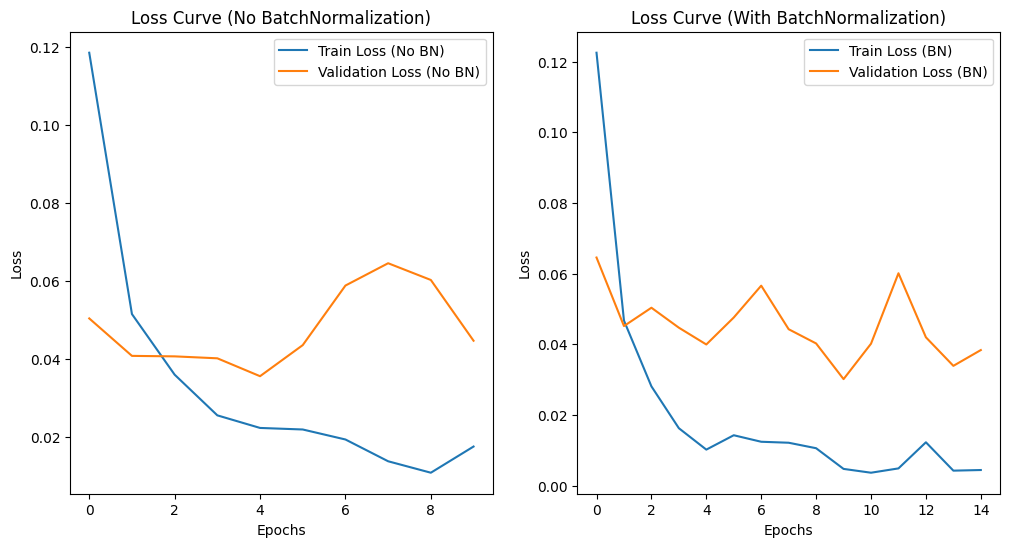

In [8]:
plt.figure(figsize=(12, 6))

#without BatchNormalization 
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss (No BN)')
plt.plot(history.history['val_loss'], label='Validation Loss (No BN)')
plt.title('Loss Curve (No BatchNormalization)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#with BatchNormalization 
plt.subplot(1, 2, 2)
plt.plot(history_bn.history['loss'], label='Train Loss (BN)')
plt.plot(history_bn.history['val_loss'], label='Validation Loss (BN)')
plt.title('Loss Curve (With BatchNormalization)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Η προσθήκη Batch Normalization φάνηκε να οδηγεί σε πιο σταθερό και ισχυρότερο μοντέλο.**

# Ερώτημα d)

Epoch 1/500
383/383 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7738 - loss: 0.6724 - val_accuracy: 0.9711 - val_loss: 0.1139
Epoch 2/500
383/383 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9462 - loss: 0.1905 - val_accuracy: 0.9739 - val_loss: 0.0934
Epoch 3/500
383/383 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9577 - loss: 0.1428 - val_accuracy: 0.9786 - val_loss: 0.0822
Epoch 4/500
383/383 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9661 - loss: 0.1167 - val_accuracy: 0.9789 - val_loss: 0.0807
Epoch 5/500
383/383 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9686 - loss: 0.1043 - val_accuracy: 0.9807 - val_loss: 0.0744
Epoch 6/500
383/383 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9736 - loss: 0.0930 - val_accuracy: 0.9812 - val_loss: 0.0749
Epoch 7/500
383/383 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9775 - loss: 0.0824 - val_accuracy: 0.9850 - val_loss: 0.0579
Epoch 8/500
383/383 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9768 - loss: 0.0764 - val_accu

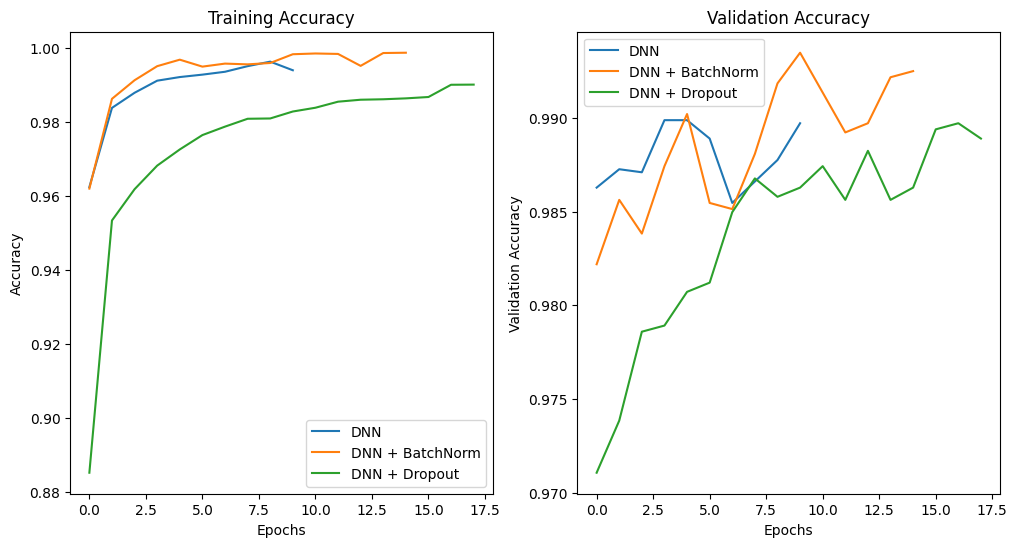

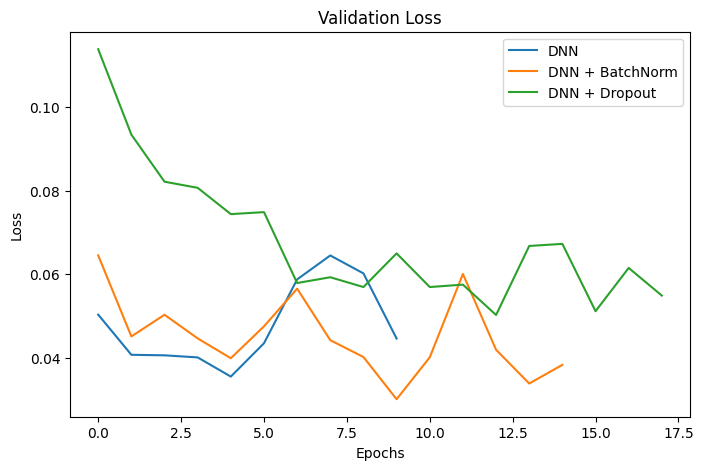

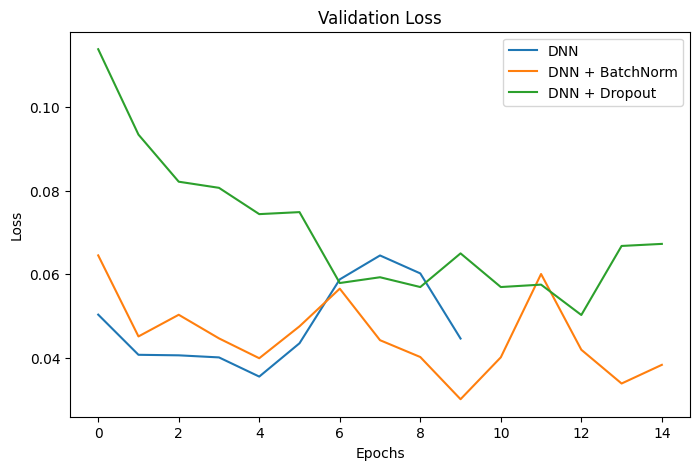

In [9]:
model_dropout = Sequential([
    Input(shape=(28, 28)),  
    Flatten()
])
for _ in range(5):
    model_dropout.add(Dense(100, kernel_initializer='he_normal'))
    model_dropout.add(Dropout(0.3))  # Dropout 30%
    model_dropout.add(keras.layers.ELU())

model_dropout.add(Dense(5, activation='softmax'))  

model_dropout.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_dropout = model_dropout.fit(X_train, y_train, epochs=500, validation_split=0.2,batch_size=64, callbacks=[early_stopping])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='DNN')
plt.plot(history_bn.history['accuracy'], label='DNN + BatchNorm')
plt.plot(history_dropout.history['accuracy'], label='DNN + Dropout')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['val_accuracy'], label='DNN')
plt.plot(history_bn.history['val_accuracy'], label='DNN + BatchNorm')
plt.plot(history_dropout.history['val_accuracy'], label='DNN + Dropout')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(history.history['val_loss'], label='DNN')
plt.plot(history_bn.history['val_loss'], label='DNN + BatchNorm')
plt.plot(history_dropout.history['val_loss'], label='DNN + Dropout')
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(history.history['val_loss'][:15], label='DNN')
plt.plot(history_bn.history['val_loss'][:15], label='DNN + BatchNorm')
plt.plot(history_dropout.history['val_loss'][:15], label='DNN + Dropout')
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Το τελικό plot έχει μόνο τα 15 πρώτα epochs για καλύτερη σύγκριση. Παρατηρώ ότι όσο μεγαλώνει ο αριθμός των epochs τόσο η συμπεριφορά των μοντέλων συγκλίνει.**
**Παρατηρώ επίσης, ότι με το batch normalization έχω αρκετά πιο σταθερή συμπεριφορά τόσο στο validation accuracy όσο και στο validation loss πράγμα που υποδεικνύει ένα  καλό μοντέλο για αποφυγή του overfit.**

__________________________________________________________________________________________________________________________

### Problem 2 (transfer learning problem)

a. Create a new DNN that reuses all the pretrained hidden layers of the previous model (problem 1 of HW2), freezes them (try freezing all the reused layers for a few epochs, according to the "pretrained layers" example covered in Lecture 5 - this material is presented in pages 373-376 of A. Geron's book ["Reusing Pretrained Layers" and "Transfer Learning with Keras" sections]), and replaces the softmax output layer with a new one. 

b. Train this new DNN on digits 5 to 9, using only 100 images per digit, and time how long it takes. Despite this small number of examples, can you achieve high precision? 


c. Try reusing just four hidden layers instead of five. Can you achieve a higher precision?

d. Now unfreeze the top two hidden layers and continue training. Can you get the model to perform even better?

# Ερώτημα a)

In [10]:
pretrained_model=keras.models.Sequential([
    Input(shape=(28,28)),  
    Flatten()
])

for layer in model.layers[1:-1]:  
    pretrained_model.add(layer)

#freeze
for layer in pretrained_model.layers:
    layer.trainable=False
    
#replace
pretrained_model.add(Dense(10,activation='softmax')) 

pretrained_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
pretrained_model.summary()

early_stopping=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119,910 (468.40 KB)

 Trainable params: 1,010 (3.95 KB)

 Non-trainable params: 118,900 (464.45 KB)

# Ερώτημα b)

In [11]:
train_mask2 = (y_train_full >= 5)
test_mask2 = (y_test_full >= 5)

X_train2, y_train2 = X_train_full[train_mask2], y_train_full[train_mask2]
X_test2, y_test2 = X_test_full[test_mask2], y_test_full[test_mask2]

X_small = []
y_small = []
digits = [5, 6, 7, 8, 9]

for digit in digits:
    count = 0
    for i in range(len(y_train2)):  # looking at the training set labels
        if y_train2[i] == digit:    # if the label is one of the digits we want
            X_small.append(X_train2[i])
            y_small.append(y_train2[i])
            count += 1
        if count == 100:  # stop after finding 100 images
            break

X_small = np.array(X_small)  # keras fit needs arrays 
y_small = np.array(y_small)

shuffle = np.random.permutation(len(X_small))
X_train_small = X_small[shuffle]  # to avoid order bias
y_train_small = y_small[shuffle]

pretrained_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

start = time.time()
history_pretrained = pretrained_model.fit(X_train_small, y_train_small, epochs=30, validation_split=0.2, callbacks=[early_stopping])
end = time.time()
print(f"Training time: {end - start:.2f} seconds")

Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - accuracy: 0.1437 - loss: 4.1902 - val_accuracy: 0.1700 - val_loss: 3.2594
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2299 - loss: 3.0732 - val_accuracy: 0.2800 - val_loss: 2.3129
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.3365 - loss: 2.3184 - val_accuracy: 0.4000 - val_loss: 1.6900
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.4356 - loss: 1.8324 - val_accuracy: 0.5100 - val_loss: 1.3105
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5283 - loss: 1.5221 - val_accuracy: 0.6800 - val_loss: 1.1009
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5995 - loss: 1.3142 - val_accuracy: 0.7300 - val_loss: 0.9875
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6478 - loss: 1.1658 - val_accuracy: 0.7400 - val_loss: 0.9209
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6649 - loss: 1.0564 - val_accuracy: 0.7400 -

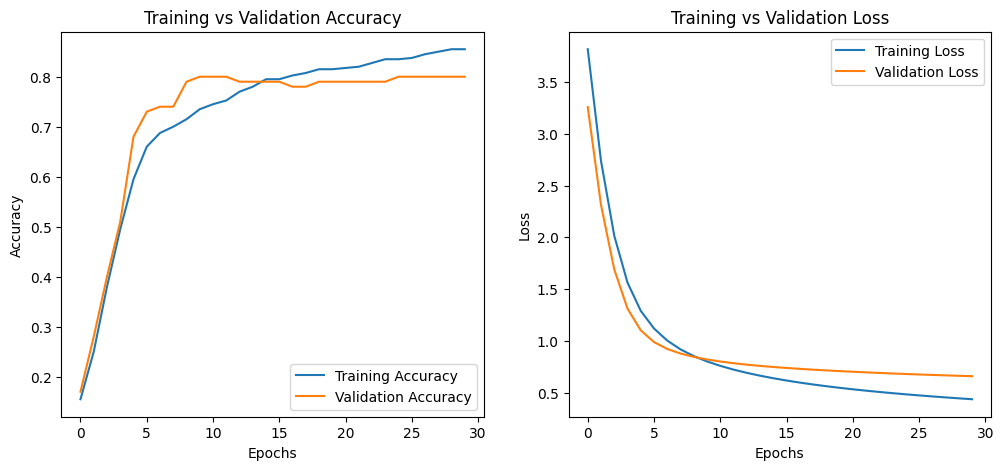

In [12]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_pretrained.history['accuracy'], label='Training Accuracy')
plt.plot(history_pretrained.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_pretrained.history['loss'], label='Training Loss')
plt.plot(history_pretrained.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

In [13]:
test_loss, test_accuracy = pretrained_model.evaluate(X_test2, y_test2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7390 - loss: 0.7937
Test Accuracy: 77.19%


# Ερώτημα c)

In [14]:
pretrained_model2=keras.models.Sequential([
    Input(shape=(28,28)),  
    Flatten()
])

for layer in model.layers[1:-2]:  
    pretrained_model2.add(layer)

#freeze
for layer in pretrained_model2.layers:
    layer.trainable = False

pretrained_model2.add(Dense(10, activation='softmax'))

pretrained_model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
start = time.time()
history_pretrained2 = pretrained_model2.fit(X_train2, y_train2, epochs=30, validation_split=0.2, callbacks=[early_stopping])
end= time.time()
print(f"Training time: {end - start:.2f} seconds")

Epoch 1/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6009 - loss: 1.3144 - val_accuracy: 0.8777 - val_loss: 0.3856
Epoch 2/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8727 - loss: 0.3963 - val_accuracy: 0.9036 - val_loss: 0.3068
Epoch 3/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8945 - loss: 0.3240 - val_accuracy: 0.9141 - val_loss: 0.2760
Epoch 4/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9041 - loss: 0.2918 - val_accuracy: 0.9184 - val_loss: 0.2592
Epoch 5/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9084 - loss: 0.2730 - val_accuracy: 0.9204 - val_loss: 0.2484
Epoch 6/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9131 - loss: 0.2603 - val_accuracy: 0.9231 - val_loss: 0.2407
Epoch 7/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9157 - loss: 0.2511 - val_accuracy: 0.9235 - val_loss: 0.2350
Epoch 8/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9183 - loss: 0.2441 - val_accuracy: 0.

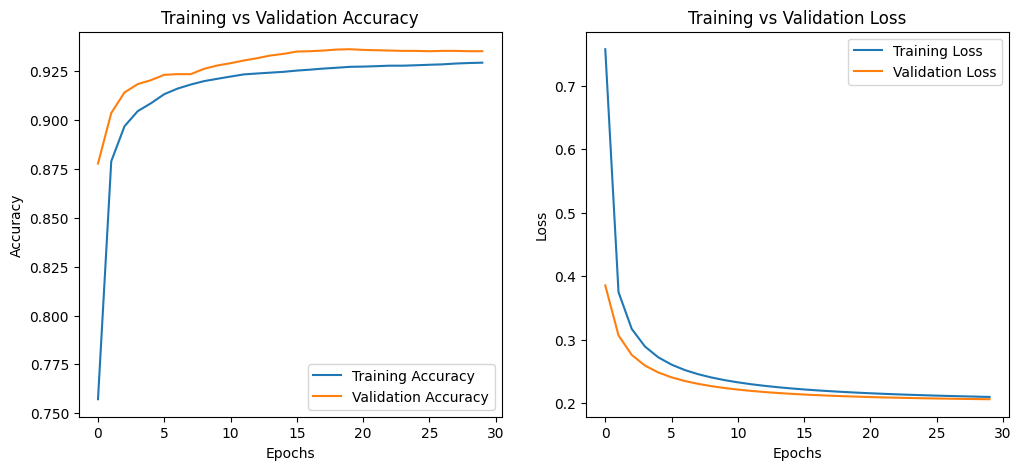

In [15]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_pretrained2.history['accuracy'], label='Training Accuracy')
plt.plot(history_pretrained2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_pretrained2.history['loss'], label='Training Loss')
plt.plot(history_pretrained2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

In [16]:
test_loss, test_accuracy = pretrained_model2.evaluate(X_test2, y_test2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9084 - loss: 0.2682
Test Accuracy: 92.74%


**Παρατηρώ ότι η ακρίβεια του test set αυξήθηκε όταν χρησιμοποιήσαμε μόνο 4 hidden layers.**

# Ερώτημα d)

In [17]:
for layer in pretrained_model2.layers[-2:]:  
    layer.trainable = True

pretrained_model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_pretrained3 = pretrained_model2.fit(X_train2, y_train2, epochs=30, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9311 - loss: 0.2014 - val_accuracy: 0.9490 - val_loss: 0.1603
Epoch 2/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9587 - loss: 0.1278 - val_accuracy: 0.9549 - val_loss: 0.1464
Epoch 3/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9663 - loss: 0.1046 - val_accuracy: 0.9572 - val_loss: 0.1384
Epoch 4/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9703 - loss: 0.0915 - val_accuracy: 0.9600 - val_loss: 0.1324
Epoch 5/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9726 - loss: 0.0825 - val_accuracy: 0.9623 - val_loss: 0.1275
Epoch 6/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9753 - loss: 0.0755 - val_accuracy: 0.9646 - val_loss: 0.1237
Epoch 7/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9770 - loss: 0.0697 - val_accuracy: 0.9658 - val_loss: 0.1205
Epoch 8/30
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9789 - loss: 0.0648 - val_accuracy: 0.

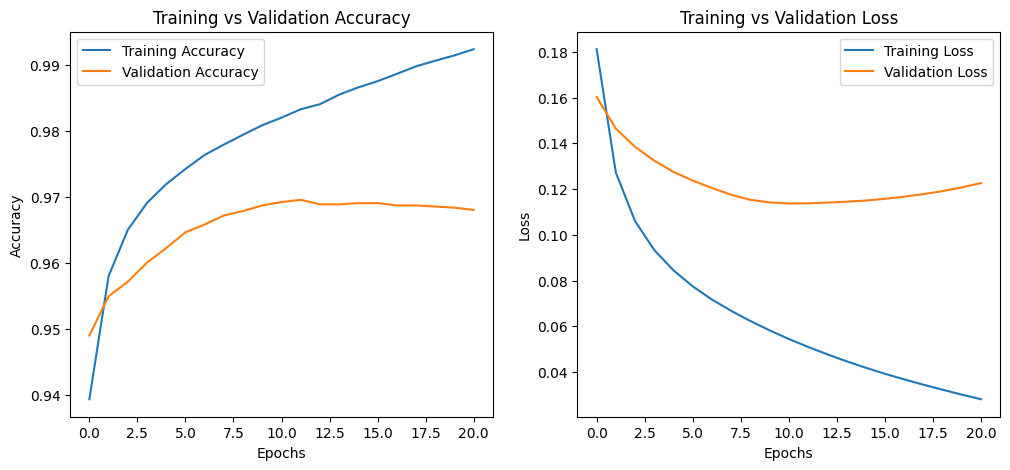

In [18]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_pretrained3.history['accuracy'], label='Training Accuracy')
plt.plot(history_pretrained3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_pretrained3.history['loss'], label='Training Loss')
plt.plot(history_pretrained3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

In [19]:
test_loss, test_accuracy = pretrained_model2.evaluate(X_test2, y_test2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9544 - loss: 0.1655
Test Accuracy: 96.26%


**Το μοντέλο συμπεριφέρεται καλύτερα απ' ότι στο προηγούμενο ερώτημα πετυχαίνοντας ακρίβεια στο test set 96.26% σε αντίθεση με προηγουμένως που ήταν γύρω στο 77% & 92%.**

__________________________________________________________________________________________________________________________

### Problem 3

- Part a) What are the advantages of a CNN over a fully connected DNN for image classification?

- Part b) Make a sketch (by hand, on a piece of paper) to show (explain) your answer(s) to Part a)

**part a)**


1)Οι CNN χρησιμοποιούν φίλτρα που κάνουν slide πάνω στην εικόνα, άρα χρησιμοποιούν λιγότερες παραμέτρους (λιγότεροι υπολογισμοί) από DNN, που συνδέει κάθε pixel με κάθε νευρώνα. Οπότε το training είναι πιο γρήγορο και πιο εύκολο.

2)Αντί να χρειάζεται να μάθει ξεχωριστά κάθε θέση ενός μοτίβου, το CNN αναγνωρίζει τα ίδια μοτίβα όπου κι αν βρίσκονται στην εικόνα.

3)Καλύτερη κατανόηση εικόνας: Τα CNNs πρώτα μαθαίνουν απλά σχήματα (όπως γραμμές), μετά πιο πολύπλοκα μοτίβα (όπως γωνίες) και στο τέλος ολόκληρα αντικείμενα (π.χ. πρόσωπα, ζώα).

4)Επειδή δεν έχουν τόσες πολλές παραμέτρους, τα CNNs δεν αποστηθίζουν εύκολα τα δεδομένα, αλλά γενικεύουν καλύτερα σε νέες εικόνες (preventing overfitting).

**part b)**

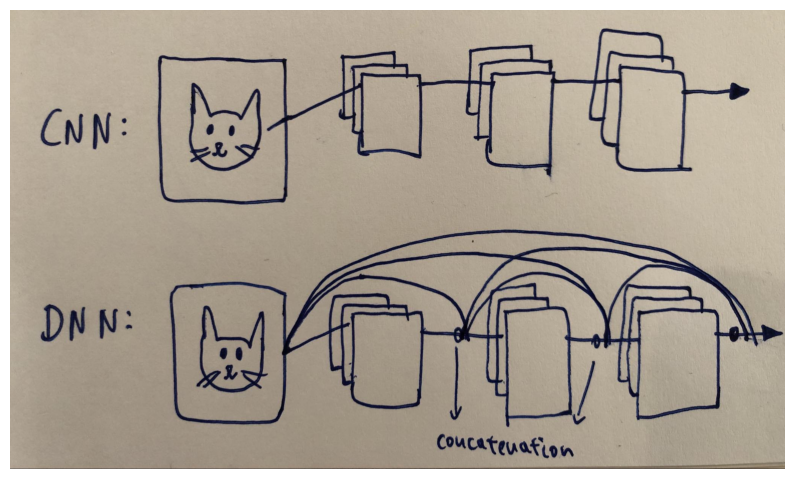

In [20]:
img1 = cv2.imread('C:/Users/micha/Downloads/hw2.jpg')  
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)  
plt.figure(figsize=(10,8))  
plt.imshow(img1)
plt.axis("off")   
plt.show()

____________________________________________________________________________________________________________________________

### Problem 4:



In Lecture 6, we discussed a CNN (on MNIST) that uses 2 convolutional layers, followed by 1 pooling layer, then dropout 25%, then a dense layer, another dropout layer but with 50% dropout, and finally the output layer. [Do not forget to flatten the output of the MaxPool2D layer before stacking the dense layers]. 

Try to beat the level of accuracy (on the test set, the validation set, the train set) achieved in Lecture 6 CNN by adding (or removing) layers, and changing the parameters.

***NOTE: if it takes too much time to train your CNNs, try running just one of them (for few epochs), but present the "candidate" CNNs you plan to train (without actually train them).***

In [21]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train_full = X_train_full / 255. # normal
X_test = X_test / 255.
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:] # training on 55.000
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:] # validating in 5.000

X_train = X_train[..., np.newaxis] # [:,:,:] = [...] and I use it to add sthing in the end
X_valid = X_valid[..., np.newaxis] # adds 1 axis, leaves the current dimensions as they are
X_test = X_test[..., np.newaxis]

keras.backend.clear_session() # clears keras memory from old models
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, padding="same", activation="relu"), # identifies basic patterns
    # adding the next one
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, kernel_size=3, padding="same", activation="relu"), # identifies more complex objects
    keras.layers.BatchNormalization(),

    keras.layers.MaxPool2D(), # decrease the size, keep only the important
    keras.layers.Dropout(0.25), # dropping out 25% of the neurons to avoid overfitting
    # adding one more conv
    keras.layers.Conv2D(128, 3, padding="same", activation="relu"),  # <-- ΝΕΟ επιπλέον block
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(),
    keras.layers.Dropout(0.25),

    keras.layers.Flatten(), # from 2D to 1D

    keras.layers.Dense(128, activation="relu"), # fully connected layer
    keras.layers.BatchNormalization(),

    keras.layers.Dropout(0.5), 
    keras.layers.Dense(10, activation="softmax")
])

optimizer = keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])

# early stopping to avoid overfitting
early_stop = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)


history = model.fit(X_train, y_train, epochs=40, validation_data=(X_valid, y_valid),
                    callbacks=[early_stop], batch_size=64)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Epoch 1/40
860/860 ━━━━━━━━━━━━━━━━━━━━ 237s 267ms/step - accuracy: 0.9068 - loss: 0.3140 - val_accuracy: 0.9860 - val_loss: 0.0468
Epoch 2/40
860/860 ━━━━━━━━━━━━━━━━━━━━ 224s 260ms/step - accuracy: 0.9805 - loss: 0.0663 - val_accuracy: 0.9900 - val_loss: 0.0315
Epoch 3/40
860/860 ━━━━━━━━━━━━━━━━━━━━ 217s 252ms/step - accuracy: 0.9845 - loss: 0.0502 - val_accuracy: 0.9926 - val_loss: 0.0276
Epoch 4/40
860/860 ━━━━━━━━━━━━━━━━━━━━ 221s 257ms/step - accuracy: 0.9865 - loss: 0.0432 - val_accuracy: 0.9930 - val_loss: 0.0299
Epoch 5/40
860/860 ━━━━━━━━━━━━━━━━━━━━ 228s 265ms/step - accuracy: 0.9885 - loss: 0.0352 - val_accuracy: 0.9908 - val_loss: 0.0294
Epoch 6/40
860/860 ━━━━━━━━━━━━━━━━━━━━ 227s 264ms/step - accuracy: 0.9906 - loss: 0.0308 - val_accuracy: 0.9920 - val_loss: 0.0274
Epoch 7/40
860/860 ━━━━━━━━━━━━━━━━━━━━ 241s 280ms/step - accuracy: 0.9914 - loss: 0.0280 - val_accuracy: 0.9920 - val_loss: 0.0315
Epoch 8/40
860/860 ━━━━━━━━━━━━━━━━━━━━ 251s 291ms/step - accuracy: 0.9919 

Changes made:
1. Increced epochs from 10 to 40 
2. Changed optimizer to Adam
3. Added early stopping to avoid overfitting
4. Normalized after each conv layer for stable learning
5. Used dropout

Achived test accuracy of 99.46%

__________________________________________________________________________________________________________________________

οι συνομιλίες μου με το ChatGPT για την κατανόηση των προβλημάτων και την βοήθεια στην εκπόνηση τους.

https://chatgpt.com/share/67eaa4ac-fec0-8013-973f-85d107132b5c

https://chatgpt.com/share/67eaa4dd-c33c-8013-b177-13f1e21601bc